<a href="https://colab.research.google.com/github/JakeOh/202505_BD50/blob/main/lab_da/ml05_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

머신 러닝(Machine Learning) 종류 - 사람의 감독 하에 훈련하는 것인 지 아닌 지 분류
*   지도 학습(Supervised Learning): 레이블(타겟)이 있는 데이터를 학습.
    *   분류(classification): 클래스들을 분류.
    *   회귀(regression): 숫자 예측.
*   비지도 학습(Unsupervised Learning): 레이블이 없는 데이터를 학습.
    *   군집(clustering)
    *   시각화(visualization)
    *   이상치(outlier) 탐지
*   준지도 학습(semi-supervised learning): 비지도 학습 + 전문가 시스템
*   강화 학습(reinforcement learning): 보상과 벌칙을 통해서 학습.

# 문제

fish 데이터셋에서 물고기의 무게를 예측.
*   Perch(농어)의 무게(Weight)를 길이(Length) 특성만으로 예측.
    *   Weight(관심 변수, 레이블, 타겟) ~ Length(독립 변수, 특성)
    *   KNN, Linear Regression
*   Perch의 무게를 다른 4개의 특성들로 예측.
    *   Weight ~ Length + Diagonal + Height + Width
    *   Linear Regression

# Imports

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor  # KNN을 이용한 숫자 예측 알고리즘.
from sklearn.linear_model import LinearRegression  # 선형 회귀을 이용한 숫자 예측 알고리즘.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # 회귀 평가 지표들
from sklearn.preprocessing import PolynomialFeatures  # 다차항을 추가해 주는 변환기
from sklearn.pipeline import Pipeline  # 변환기와 추정기를 연결해서 추정기 역할을 하는 클래스.

# 데이터 준비

In [38]:
file_path = 'https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/fish.csv'

In [39]:
fish = pd.read_csv(file_path)

In [40]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [41]:
perch = fish[fish.Species == 'Perch']

In [42]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


농어의 무게(Weight)를 길이(Length)만으로 예측할 수 있을까?
*   특성(feature): Length -> *2차원 배열*
*   레이블(label), 타겟(target): Weight -> *1차원 배열*

In [43]:
# 특성 배열 - (samples, features) shape의 2차원 배열
X = perch[['Length']].values.copy()

In [44]:
X[:5]

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4]])

In [45]:
X.shape  #> 샘플 개수: 56, 특성 개수: 1

(56, 1)

In [46]:
# 타겟 배열 - (samples,) shape의 1차원 배열
y = perch['Weight'].values.copy()

In [47]:
y[:5]

array([ 5.9, 32. , 40. , 51.5, 70. ])

In [48]:
y.shape

(56,)

# 훈련 셋/테스트 셋 분리

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42, 1), (14, 1), (42,), (14,))

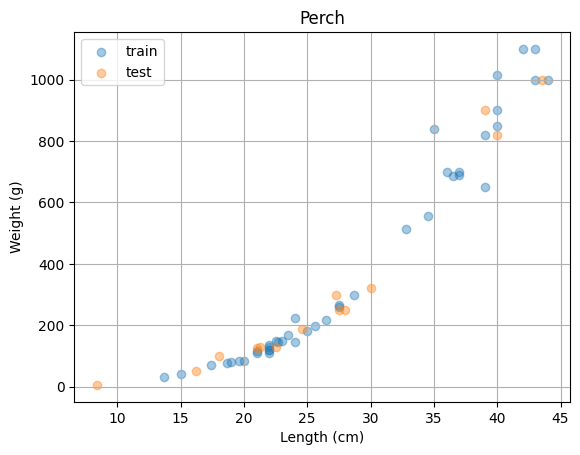

In [51]:
#  y(Weight) ~ X(Length) 산점도 시각화. 훈련 셋/테스트 셋 구분.
plt.scatter(X_train, y_train, label='train', alpha=0.4)
plt.scatter(X_test, y_test, label='test', alpha=0.4)

plt.legend()
plt.grid()
plt.title('Perch')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

# KNN 모델 훈련, 평가

KNN(K-Nearest Neighbors) Regressor: 가장 가까운 k개의 이웃들의 레이블(타겟) 평균 값으로 숫자를 예측하는 모델.

In [52]:
knn = KNeighborsRegressor()  # 모델 생성

In [53]:
knn.fit(X_train, y_train)  # 모델 훈련

KNeighborsRegressor()

In [54]:
train_pred = knn.predict(X_train)  # 훈련 셋의 예측값 - 예측한 무게

In [55]:
train_pred

array([  88.6,  123. ,   79.6,   70.6,  723. ,  193. ,  847. ,  847. ,
       1010. ,  123. ,   95. ,  123. ,  174. ,  248. , 1010. ,  847. ,
        174. ,  113. ,  248. ,  847. ,  659. ,  224. ,  723. ,   60. ,
        140. ,   60. ,  719. ,  694.2,  248. ,  167. ,  847. ,  113. ,
        168. ,  123. , 1010. ,  136. ,   79.6,  719. ,  123. ,  193. ,
        990. ,  659. ])

In [56]:
y_train  # 실젯값 - 실제 무게

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [57]:
test_pred = knn.predict(X_test)  # 테스트 셋의 예측값

In [58]:
test_pred

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [59]:
y_test  # 테스트 셋의 실젯값

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

# 회귀 모델의 평가 지표(metrics)

*   MSE(Mean Squared Errors): 오차들의 제곱의 평균.
*   RMSE(Root Mean Squared Errors): MSE의 제곱근.
*   MAE(Mean Absolute Errors): 오차들의 절대값의 평균.
*   MSE, RMSE, MAE는 값이 작을 수록 좋은 점수. 값이 클 수록 나쁜 점수!
    *   일반적인 평가지표들은 값이 클 수록 좋은 점수, 값이 작을 수록 나쁜 점수.
    *   회귀 문제에서도 오차들이 작을 수록 점수가 커지는 평가지표를 개발 -> R2 score.

* $ y_i $ : $i$번째 샘플의 실젯값(label)
* $ \hat{y_i} $ : $i$번째 샘플의 예측값
* $ \bar{y} $ : 타겟의 평균값
* $ n $ : 샘플 개수

* MAE(Mean Absolute Errors)
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \lvert y_i - \hat{y_i} \rvert
$$

* MSE(Mean Squared Errors)
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2
$$

* RMSE(Root Mean Squared Errors)
$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2 }
$$

* $ R^2 $ score(Coefficient of determinant, 결정 계수)
$$
R^2 = 1 - \dfrac{\text{MSE}}{\text{Variance}}
    = 1 - \dfrac{ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 }
                { \sum_{i=1}^{n} (y_i - \bar{y})^2 }
$$
    * 결정 계수는 최댓값이 1이 되도록 만든 평가 지표.
    * 모델이 타겟을 오차없이 정확하게 예측하면, 실제값 - 예측값 = 0 이므로, 결정 계수는 최댓값 1이 됨.
    * 모델이 타겟을 매우 비슷하게 예측하면, 오차가 매우 작으면 분자가 0에 가까운 값이 되므로, 결정 계수는 1보다는 작지만 1에 가까운 값이 됨.
    * 모델이 타겟의 평균으로만 예측하는 정도라면, (분자) = (분모) 이므로, 결정 계수는 0이 됨.
    * 모델이 타겟의 평균 정도도 예측하지 못하면(오차가 매우 크면), (분자) > (분모)일 수 있고, 그런 경우 결정 계수는 음수가 될 수 있음.

In [60]:
# 훈련 셋의 MSE
mean_squared_error(y_train, train_pred)

3716.5161904761903

In [61]:
# 훈련 셋의 RMSE
np.sqrt(mean_squared_error(y_train, train_pred))

np.float64(60.96323638453089)

In [62]:
# 훈련 셋의 MAE
mean_absolute_error(y_train, train_pred)

35.76190476190476

In [63]:
# 테스트 셋의 MSE
mean_squared_error(y_test, test_pred)

721.7385714285714

In [64]:
# 테스트 셋의 MAE
mean_absolute_error(y_test, test_pred)

19.157142857142862

테스트 셋에서의 평가 점수가 훈련 셋에서의 평가 점수보다 더 좋음 -> 과소적합(underfitting)

In [65]:
# 훈련 셋 결정 계수(r2 score)
r2_score(y_train, train_pred)

0.9698823289099254

In [66]:
# 테스트 셋 결정 계수
r2_score(y_test, test_pred)

0.992809406101064

# KNN Regressor 문제점

outlier가 있는 경우 오차가 커질 수 있음.

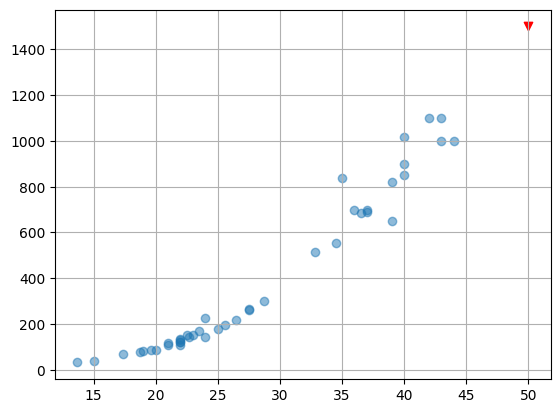

In [67]:
# 훈련 셋 시각화
plt.scatter(X_train, y_train, alpha=0.5)

# 가상의 물고기(50cm, 1500g)
plt.scatter(50, 1500, color='red', marker='v')

plt.grid()
plt.show()

In [68]:
# 길이 50cm인 물고기의 무게 예측값.
prediction = knn.predict([[50]])

In [69]:
prediction

array([1010.])

In [70]:
indices = knn.kneighbors([[50]], return_distance=False)

In [71]:
indices  # 가상의 물고기와 가장 가까운 훈련 셋 샘플의 인덱스 5개.

array([[34, 14,  8, 40,  6]])

In [72]:
y_train[indices[0]]  # 가장 가까운 5개 샘플의 레이블(무게)

array([1000., 1100., 1000., 1100.,  850.])

머신 러닝의 종류 - 단순하게 알고 있는 데이터 포인트와 새 데이터 포인트를 비교하는 것인 지, 아니면 훈련 셋에서 패턴을 발견(공식 발견)해서 예측 모델을 만드는 지
*   사례 기반 머신러닝(instance-based ML)
    *   수학적인 모델을 만들지 않고, 훈련 셋의 특성들을 이용해서 예측.
    *   outlier들이 많은 경우에는 성능이 떨어질 수 있음.
    *   예: KNN
*   모델 기반 머신러닝(model-based ML)
    *   훈련 셋에서 수학적인 모델을 만들고, 그 수학 모델로 예측.
    *   예: 선형 회귀(Linear Regression)

# Linear Regression

In [73]:
lin_reg = LinearRegression()  # 선형 회귀 모델 생성

In [74]:
lin_reg.fit(X_train, y_train)  # 선형 회귀 모델 훈련 -> MSE를 최소화하는 직선의 방정식을 찾음.

LinearRegression()

In [75]:
lin_reg.coef_  # 선형 회귀식 y = ax + b 에서 독립변수 x의 계수(직선의 기울기) a

array([39.01714496])

In [76]:
lin_reg.intercept_  # 선형 회귀식 y = ax + b 에서 y 절편 b

np.float64(-709.0186449535477)

In [77]:
train_pred = lin_reg.predict(X_train)

In [78]:
train_pred

array([  55.71739633,  149.35854425,   20.60196587,  -30.12032259,
        695.59857374,  266.40997914,  851.66715359,  812.65000863,
        968.71858848,  149.35854425,   71.32425432,  149.35854425,
        227.39283417,  363.95284155,  968.71858848,  851.66715359,
        227.39283417,  110.34139928,  363.95284155,  851.66715359,
        570.74370985,  324.93569658,  715.10714622, -174.48375895,
        176.67054572, -123.7614705 ,  734.6157187 ,  656.58142877,
        410.7734155 ,  207.88426169,  812.65000863,  110.34139928,
        188.37568921,  149.35854425, 1007.73573345,  168.86711673,
         32.30710936,  734.6157187 ,  149.35854425,  289.82026612,
        929.70144352,  637.07285629])

In [79]:
X_train @ lin_reg.coef_ + lin_reg.intercept_  # y = X @ a + b

array([  55.71739633,  149.35854425,   20.60196587,  -30.12032259,
        695.59857374,  266.40997914,  851.66715359,  812.65000863,
        968.71858848,  149.35854425,   71.32425432,  149.35854425,
        227.39283417,  363.95284155,  968.71858848,  851.66715359,
        227.39283417,  110.34139928,  363.95284155,  851.66715359,
        570.74370985,  324.93569658,  715.10714622, -174.48375895,
        176.67054572, -123.7614705 ,  734.6157187 ,  656.58142877,
        410.7734155 ,  207.88426169,  812.65000863,  110.34139928,
        188.37568921,  149.35854425, 1007.73573345,  168.86711673,
         32.30710936,  734.6157187 ,  149.35854425,  289.82026612,
        929.70144352,  637.07285629])

In [80]:
# 훈련 셋의 MSE
mean_squared_error(y_train, train_pred)  #> MSE는 KNN의 MSE보다 큼.

7422.953552609781

In [81]:
# 훈련 셋의 결정계수
r2_score(y_train, train_pred)  #> 결정계수는 KNN의 결정계수보다 작음.

0.939846333997604

In [83]:
# 테스트 셋의 예측값
test_pred = lin_reg.predict(X_test)

# 테스트 셋의 MSE
mean_squared_error(y_test, test_pred)  #> KNN의 MSE보다 큼.

17590.265977889187

In [84]:
# 테스트 셋의 결정계수
r2_score(y_test, test_pred)  #> KNN 결정계수보다 작음.

0.8247503123313558

Linear Regression 모델의 결과를 보면, 훈련 셋의 평가 점수(MSE, R2)가 테스트 셋의 평가 점수보다 좋음 -> 과적합(overfitting)

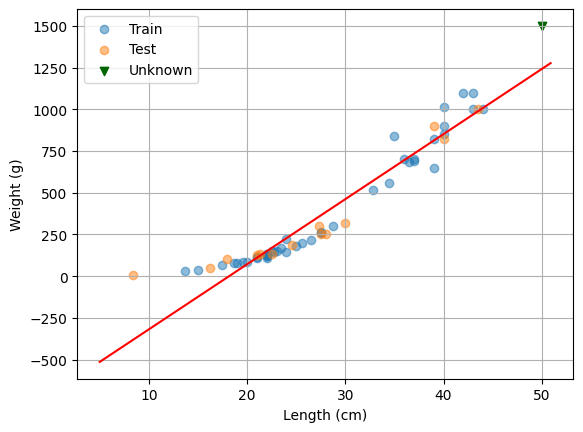

In [94]:
# 훈련 셋 무게~길이 산점도
plt.scatter(X_train, y_train, alpha=0.5, label='Train')

# 테스트 셋 무게~길이 산점도
plt.scatter(X_test, y_test, alpha=0.5, label='Test')

# 가상의 물고기(50cm, 1500g)
plt.scatter(50, 1500, marker='v', color='DarkGreen', label='Unknown')

# 선형 회귀 직선 선그래프
x = np.arange(5, 51, 0.1).reshape((-1, 1))
y_hat = x @ lin_reg.coef_ + lin_reg.intercept_  # (n, 1) @ (1,) -> (n,)
plt.plot(x, y_hat, 'r-')

plt.legend()
plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

# 다항 회귀

2차항을 포함하는 선형 회귀

In [98]:
X_train.shape, X_test.shape

((42, 1), (14, 1))

In [99]:
X_train_poly = np.c_[X_train ** 2, X_train]  # 2차항을 추가한 2차원 배열

In [101]:
X_train_poly.shape

(42, 2)

In [102]:
X_train_poly[:5, :]

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ]])

In [103]:
lin_reg = LinearRegression()  # 모델 생성

In [105]:
lin_reg.fit(X_train_poly, y_train)  # 모델 훈련 -> y = ax^2 + bx + c 함수의 계수 a, b와 절편 y를 찾음.

LinearRegression()

In [106]:
lin_reg.coef_  # (2,) shape의 1차원 배열 <- 특성이 2개(x^2, x)이기 때문에

array([  1.01433211, -21.55792498])

In [107]:
lin_reg.intercept_

np.float64(116.0502107827827)

In [108]:
X_train_poly @ lin_reg.coef_ + lin_reg.intercept_
# (42, 2) @ (2,) -> (42,)
# (42,) + scalar -> (42,)

array([  83.18070434,  132.71260219,   67.61880901,   48.04150559,
        654.5393253 ,  211.05965467,  876.66458663,  818.09027497,
       1064.55950693,  132.71260219,   90.62455496,  132.71260219,
        182.91530629,  290.29593158, 1064.55950693,  876.66458663,
        182.91530629,  110.65424646,  290.29593158,  876.66458663,
        500.20932803,  257.07992265,  680.52990177,   11.08663218,
        149.3605064 ,   20.90606071,  707.0276443 ,  604.07967051,
        332.83297906,  169.60388118,  818.09027497,  110.65424646,
        156.79962213,  132.71260219, 1131.24847547,  144.50252913,
         72.62352767,  707.0276443 ,  132.71260219,  228.92002253,
        999.89920261,  579.6105922 ])

In [109]:
train_pred = lin_reg.predict(X_train_poly)  # 훈련 셋의 예측값

In [110]:
train_pred

array([  83.18070434,  132.71260219,   67.61880901,   48.04150559,
        654.5393253 ,  211.05965467,  876.66458663,  818.09027497,
       1064.55950693,  132.71260219,   90.62455496,  132.71260219,
        182.91530629,  290.29593158, 1064.55950693,  876.66458663,
        182.91530629,  110.65424646,  290.29593158,  876.66458663,
        500.20932803,  257.07992265,  680.52990177,   11.08663218,
        149.3605064 ,   20.90606071,  707.0276443 ,  604.07967051,
        332.83297906,  169.60388118,  818.09027497,  110.65424646,
        156.79962213,  132.71260219, 1131.24847547,  144.50252913,
         72.62352767,  707.0276443 ,  132.71260219,  228.92002253,
        999.89920261,  579.6105922 ])

In [111]:
# 훈련 셋의 결정계수
r2_score(y_train, train_pred)

0.9706807451768623

In [112]:
# 2차항을 포함하는 테스트 셋
X_test_poly = np.c_[X_test ** 2, X_test]

In [113]:
X_test_poly[:5, :]

array([[ 70.56,   8.4 ],
       [324.  ,  18.  ],
       [756.25,  27.5 ],
       [453.69,  21.3 ],
       [506.25,  22.5 ]])

In [114]:
test_pred = lin_reg.predict(X_test_poly)  # 테스트 셋의 예측값

In [115]:
test_pred

array([   6.5349146 ,   56.6511646 ,  290.29593158,  117.05874344,
        144.50252913,  876.66458663,  382.21135986,  199.55847561,
        818.09027497,  110.65424646, 1097.65040817,   33.01314491,
        307.66468513,  283.49043666])

In [116]:
# 테스트 셋의 결정계수
r2_score(y_test, test_pred)

0.9775935108325122

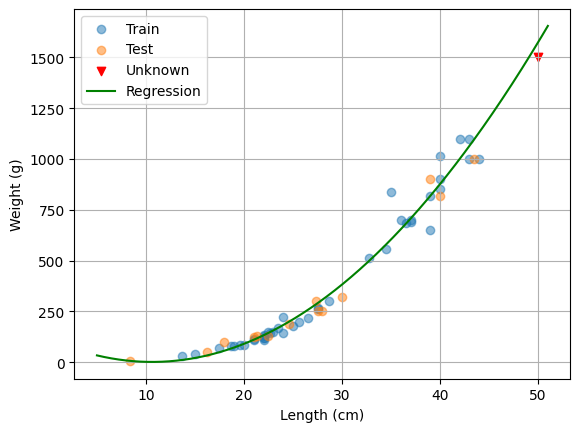

In [129]:
# 훈련 셋 산점도
plt.scatter(X_train, y_train, alpha=0.5, label='Train')

# 테스트 셋 산점도
plt.scatter(X_test, y_test, alpha=0.5, label='Test')

# 50cm, 1500g 가상의 물고기
plt.scatter(50, 1500, marker='v', color='red', label='Unknown')

# 선형회귀 2차 함수 선그래프
x = np.arange(5, 51, 0.001)
x_poly = np.c_[x ** 2, x]
# print(x_poly.shape)
# print(x_poly[:5, :])
y_hat = x_poly @ lin_reg.coef_ + lin_reg.intercept_  # x^2 * a + x * b + c
plt.plot(x, y_hat, 'g-', label='Regression')

plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.show()

# Pipeline

Pipeline: PolynomialFeatures + LinearRegression

scikit-learn 클래스 설계 철학
*   변환기(Transformer)
    *   `fit`, `fit_transform`, `transform` 메서드들을 가지고 있음.
    *   데이터 전처리(preprocessing) 과정에서 주로 사용.
    *   예: StandardScaler, MinMaxScaler, PolynomialFeatures, ...
*   추정기(Estimator)
    *   `fit`, `predict`, `score` 메서드들을 가지고 있음.
    *   ML (분류/회귀) 알고리즘들을 구현한 클래스.
    *   KNeighborsClassifier, KNeighborsRegressor, LinearRegression, ...

In [132]:
X_train.shape, X_test.shape

((42, 1), (14, 1))

In [138]:
poly = PolynomialFeatures(degree=3, include_bias=False)  # 변환기 객체 생성
result = poly.fit_transform(X_train)  # 변환기를 사용해서 훈련 셋을 변환
print(poly.powers_)
print(result.shape)
print(result[:5, :])

[[1]
 [2]
 [3]]
(42, 3)
[[1.960000e+01 3.841600e+02 7.529536e+03]
 [2.200000e+01 4.840000e+02 1.064800e+04]
 [1.870000e+01 3.496900e+02 6.539203e+03]
 [1.740000e+01 3.027600e+02 5.268024e+03]
 [3.600000e+01 1.296000e+03 4.665600e+04]]
